# Car Price Prediction Model 
## By Sesha Venkata Sriram Erramilli 

`Problem Statement:`<br>
With the rise in the variety of cars with differentiated capabilities and features such as model, production year, category, brand, fuel type, engine volume, mileage, cylinders, colour, airbags and many more, we are bringing a car price prediction challenge for all. We all aspire to own a car within budget with the best features available. To solve the price problem we have created a dataset of 19237 for the training dataset and 8245 for the test dataset.


## 1. Data understanding and preparation

In [1]:
#Importing necessary libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the train data set
df1 = pd.read_csv('train.csv')
df1

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [3]:
#Checking info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
#Since the columns 'ID','Manufacturer' and 'Model' are not suitable for our analysis, let's drop them.
df1.drop(['ID','Manufacturer','Model'],axis=1,inplace=True)
df1

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In the `Levy` column, some rows are having value as '-'.

In the `Mileage` column, let's drop the units 'km'

In [5]:
df1['Mileage'] = df1['Mileage'].apply(lambda x: x[:-2])
df1['Mileage']

0        186005 
1        192000 
2        200000 
3        168966 
4         91901 
          ...   
19232    300000 
19233    161600 
19234    116365 
19235     51258 
19236    186923 
Name: Mileage, Length: 19237, dtype: object

In [6]:
#Changing the data type for this column to 'int64'
df1['Mileage'] = df1['Mileage'].astype('int64')
df1['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: int64

In the `Wheel` column, let's replace the "Left wheel" value with "Left-hand drive".

In [7]:
df1['Wheel']=df1['Wheel'].replace('Left wheel','Left-hand drive')
df1['Wheel'].value_counts()

Left-hand drive     17753
Right-hand drive     1484
Name: Wheel, dtype: int64

In the `Doors` column, data is in incorrect form. Let's correct them.

In [9]:
df1['Doors'].value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

In [10]:
df1['Doors']=df1['Doors'].map({'04-May':'4-5','02-Mar':'2-3','>5':'>5'})
df1['Doors']

0        4-5
1        4-5
2        4-5
3        4-5
4        4-5
        ... 
19232    2-3
19233    4-5
19234    4-5
19235    4-5
19236    4-5
Name: Doors, Length: 19237, dtype: object

In [11]:
df1['Doors'].value_counts()

4-5    18332
2-3      777
>5       128
Name: Doors, dtype: int64

In [12]:
df1

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left-hand drive,Silver,12
1,16621,1018,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4-5,Left-hand drive,Black,8
2,8467,-,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2
3,3607,862,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left-hand drive,White,0
4,11726,446,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left-hand drive,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,2-3,Left-hand drive,Silver,5
19233,15681,831,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4-5,Left-hand drive,Red,8
19234,26108,836,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,4-5,Left-hand drive,Grey,4
19235,5331,1288,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,4-5,Left-hand drive,Black,4


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Prod. year        19237 non-null  int64  
 3   Category          19237 non-null  object 
 4   Leather interior  19237 non-null  object 
 5   Fuel type         19237 non-null  object 
 6   Engine volume     19237 non-null  object 
 7   Mileage           19237 non-null  int64  
 8   Cylinders         19237 non-null  float64
 9   Gear box type     19237 non-null  object 
 10  Drive wheels      19237 non-null  object 
 11  Doors             19237 non-null  object 
 12  Wheel             19237 non-null  object 
 13  Color             19237 non-null  object 
 14  Airbags           19237 non-null  int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 2.2+ MB


There are 10 categorical features and rest all are numerical in our data frame. Let's take all those into two different lists respectively.

In [14]:
cats = [i for i in df1.columns if df1[i].dtype=='O']
nums = [i for i in df1.columns if df1[i].dtype!='O']
print(cats)
print(nums)

['Levy', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']
['Price', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags']


Since, we are having more no.of categorical features, let's use LabelEncoder to encode all the categorical values to numerical values.

In [15]:
#Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cats:
    df1[col]=label_encoder.fit_transform(df1[col])
df1

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,114,2010,4,1,2,63,186005,6.0,0,0,1,0,12,12
1,16621,4,2011,4,0,5,56,192000,6.0,2,0,1,0,1,8
2,8467,0,2006,3,0,5,22,200000,4.0,3,1,1,1,1,2
3,3607,512,2011,4,1,2,46,168966,4.0,0,0,1,0,14,0
4,11726,366,2014,3,1,5,22,91901,4.0,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,1999,1,1,0,37,300000,4.0,1,2,0,0,12,5
19233,15681,504,2011,9,1,5,44,161600,4.0,2,1,1,0,11,8
19234,26108,508,2010,4,1,1,36,116365,4.0,0,1,1,0,7,4
19235,5331,83,2007,4,1,1,36,51258,4.0,0,1,1,0,1,4


In [16]:
#Let's encode year column as well, because it is a 4 digit number
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['Prod. year'] = label_encoder.fit_transform(df1['Prod. year'])
df1

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,114,43,4,1,2,63,186005,6.0,0,0,1,0,12,12
1,16621,4,44,4,0,5,56,192000,6.0,2,0,1,0,1,8
2,8467,0,39,3,0,5,22,200000,4.0,3,1,1,1,1,2
3,3607,512,44,4,1,2,46,168966,4.0,0,0,1,0,14,0
4,11726,366,47,3,1,5,22,91901,4.0,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,32,1,1,0,37,300000,4.0,1,2,0,0,12,5
19233,15681,504,44,9,1,5,44,161600,4.0,2,1,1,0,11,8
19234,26108,508,43,4,1,1,36,116365,4.0,0,1,1,0,7,4
19235,5331,83,40,4,1,1,36,51258,4.0,0,1,1,0,1,4


In [17]:
# #Let's check the info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  int32  
 2   Prod. year        19237 non-null  int64  
 3   Category          19237 non-null  int32  
 4   Leather interior  19237 non-null  int32  
 5   Fuel type         19237 non-null  int32  
 6   Engine volume     19237 non-null  int32  
 7   Mileage           19237 non-null  int64  
 8   Cylinders         19237 non-null  float64
 9   Gear box type     19237 non-null  int32  
 10  Drive wheels      19237 non-null  int32  
 11  Doors             19237 non-null  int32  
 12  Wheel             19237 non-null  int32  
 13  Color             19237 non-null  int32  
 14  Airbags           19237 non-null  int64  
dtypes: float64(1), int32(10), int64(4)
memory usage: 1.5 MB


Now, we have all the columns in numerical format.

## 2. Data visualization and outlier treatment 

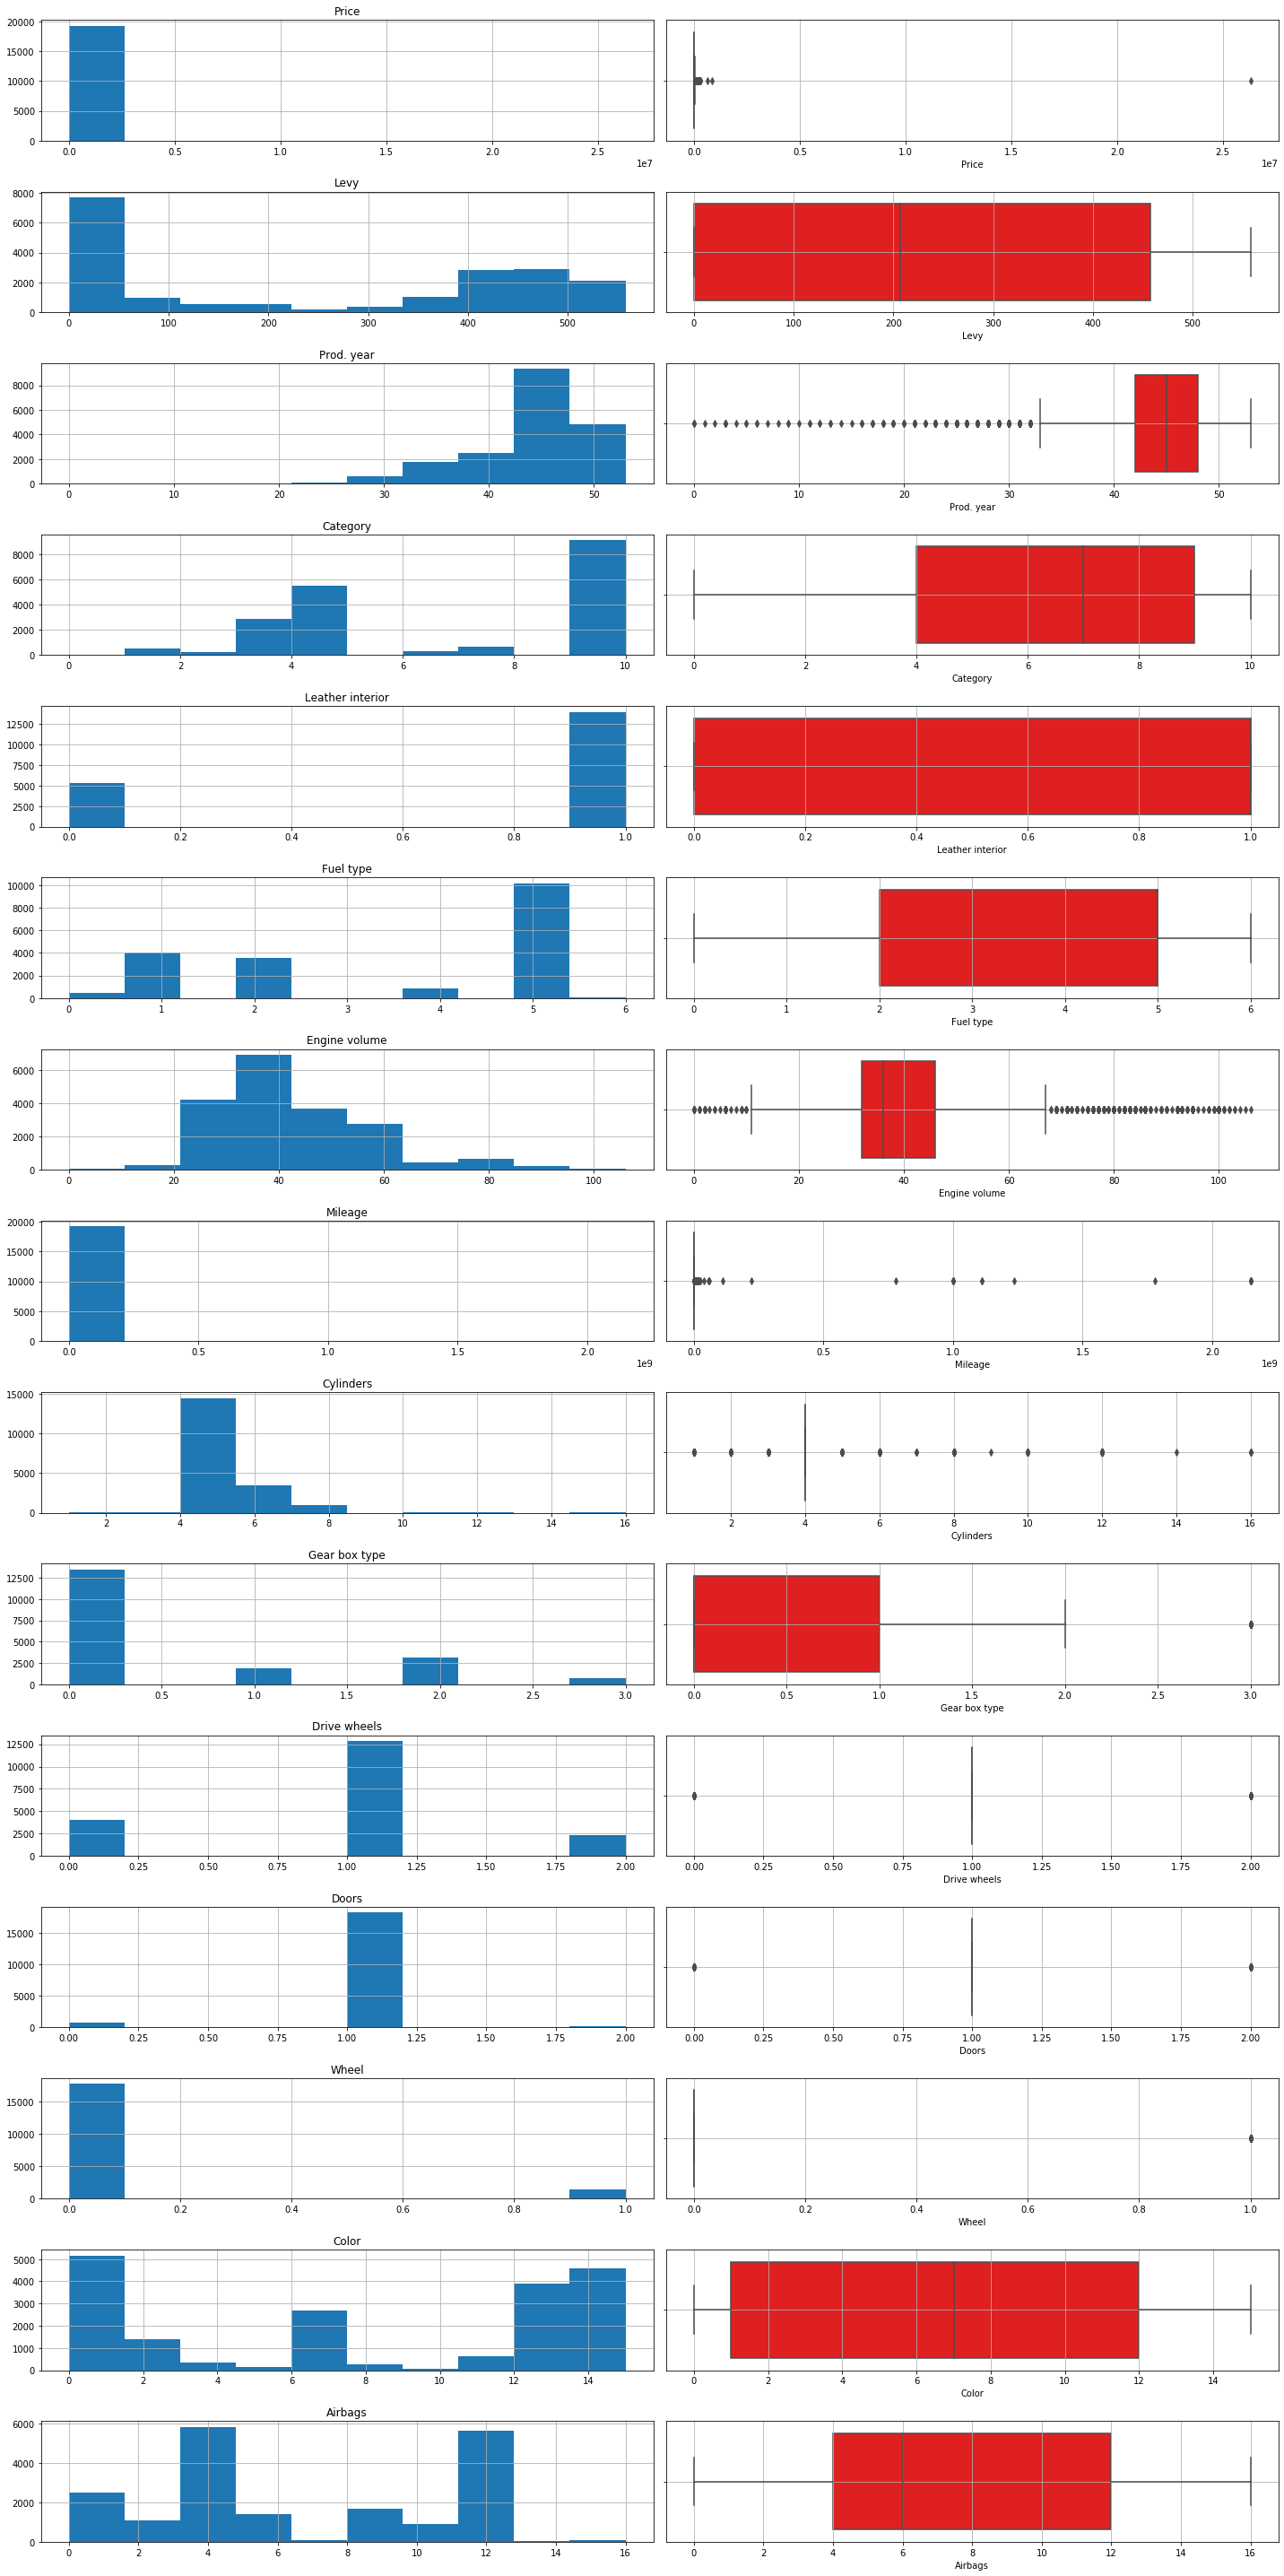

In [18]:
#Let's check the dist plot for each numerical column along with respective boxplots
plt.figure(figsize=(20,40))
i = 1
for col in df1.columns:
  plt.subplot(15,2,i)
  plt.title(col,loc='center')
  plt.hist(df1[col])
  plt.grid()
  plt.tight_layout()
  i = i+1
  plt.subplot(15,2,i)
  sns.boxplot(df1[col], color = 'red')
  plt.grid()
  plt.tight_layout()
  i=i+1
  if i>30:
    break
    
    

In [19]:
#Storing the shape of original dataframe
a = df1.shape

### Outlier treatment for 'Price',  'Prod. year', 'Engine volume', 'Mileage' columns.

In [20]:
# #Let's define a function to remove outliers
def iqr(data,x):
    q1 = data[x].quantile(0.25) #1st quartile value
    q3 = data[x].quantile(0.75) #3rd quartile value
    IQR = q3-q1 #Interquartile range
    low = q1-1.5*IQR
    high = q3+1.5*IQR
    data_inc = data.loc[(data[x]>=low) & (data[x]<=high)]
    data_esc = data.loc[(data[x]>low) & (data[x]<high)]
    data = pd.concat([data_inc,data_esc])
    return data
    

In [21]:
l = ['Price','Engine volume', 'Prod. year','Mileage']
for i in l:
    df1 = iqr(df1,i)
df1


,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,114,43,4,1,2,63,186005,6.0,0,0,1,0,12,12
1,16621,4,44,4,0,5,56,192000,6.0,2,0,1,0,1,8
2,8467,0,39,3,0,5,22,200000,4.0,3,1,1,1,1,2
3,3607,512,44,4,1,2,46,168966,4.0,0,0,1,0,14,0
4,11726,366,47,3,1,5,22,91901,4.0,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802,17,46,9,1,1,63,107800,6.0,0,2,1,0,7,12
19233,15681,504,44,9,1,5,44,161600,4.0,2,1,1,0,11,8
19234,26108,508,43,4,1,1,36,116365,4.0,0,1,1,0,7,4
19235,5331,83,40,4,1,1,36,51258,4.0,0,1,1,0,1,4


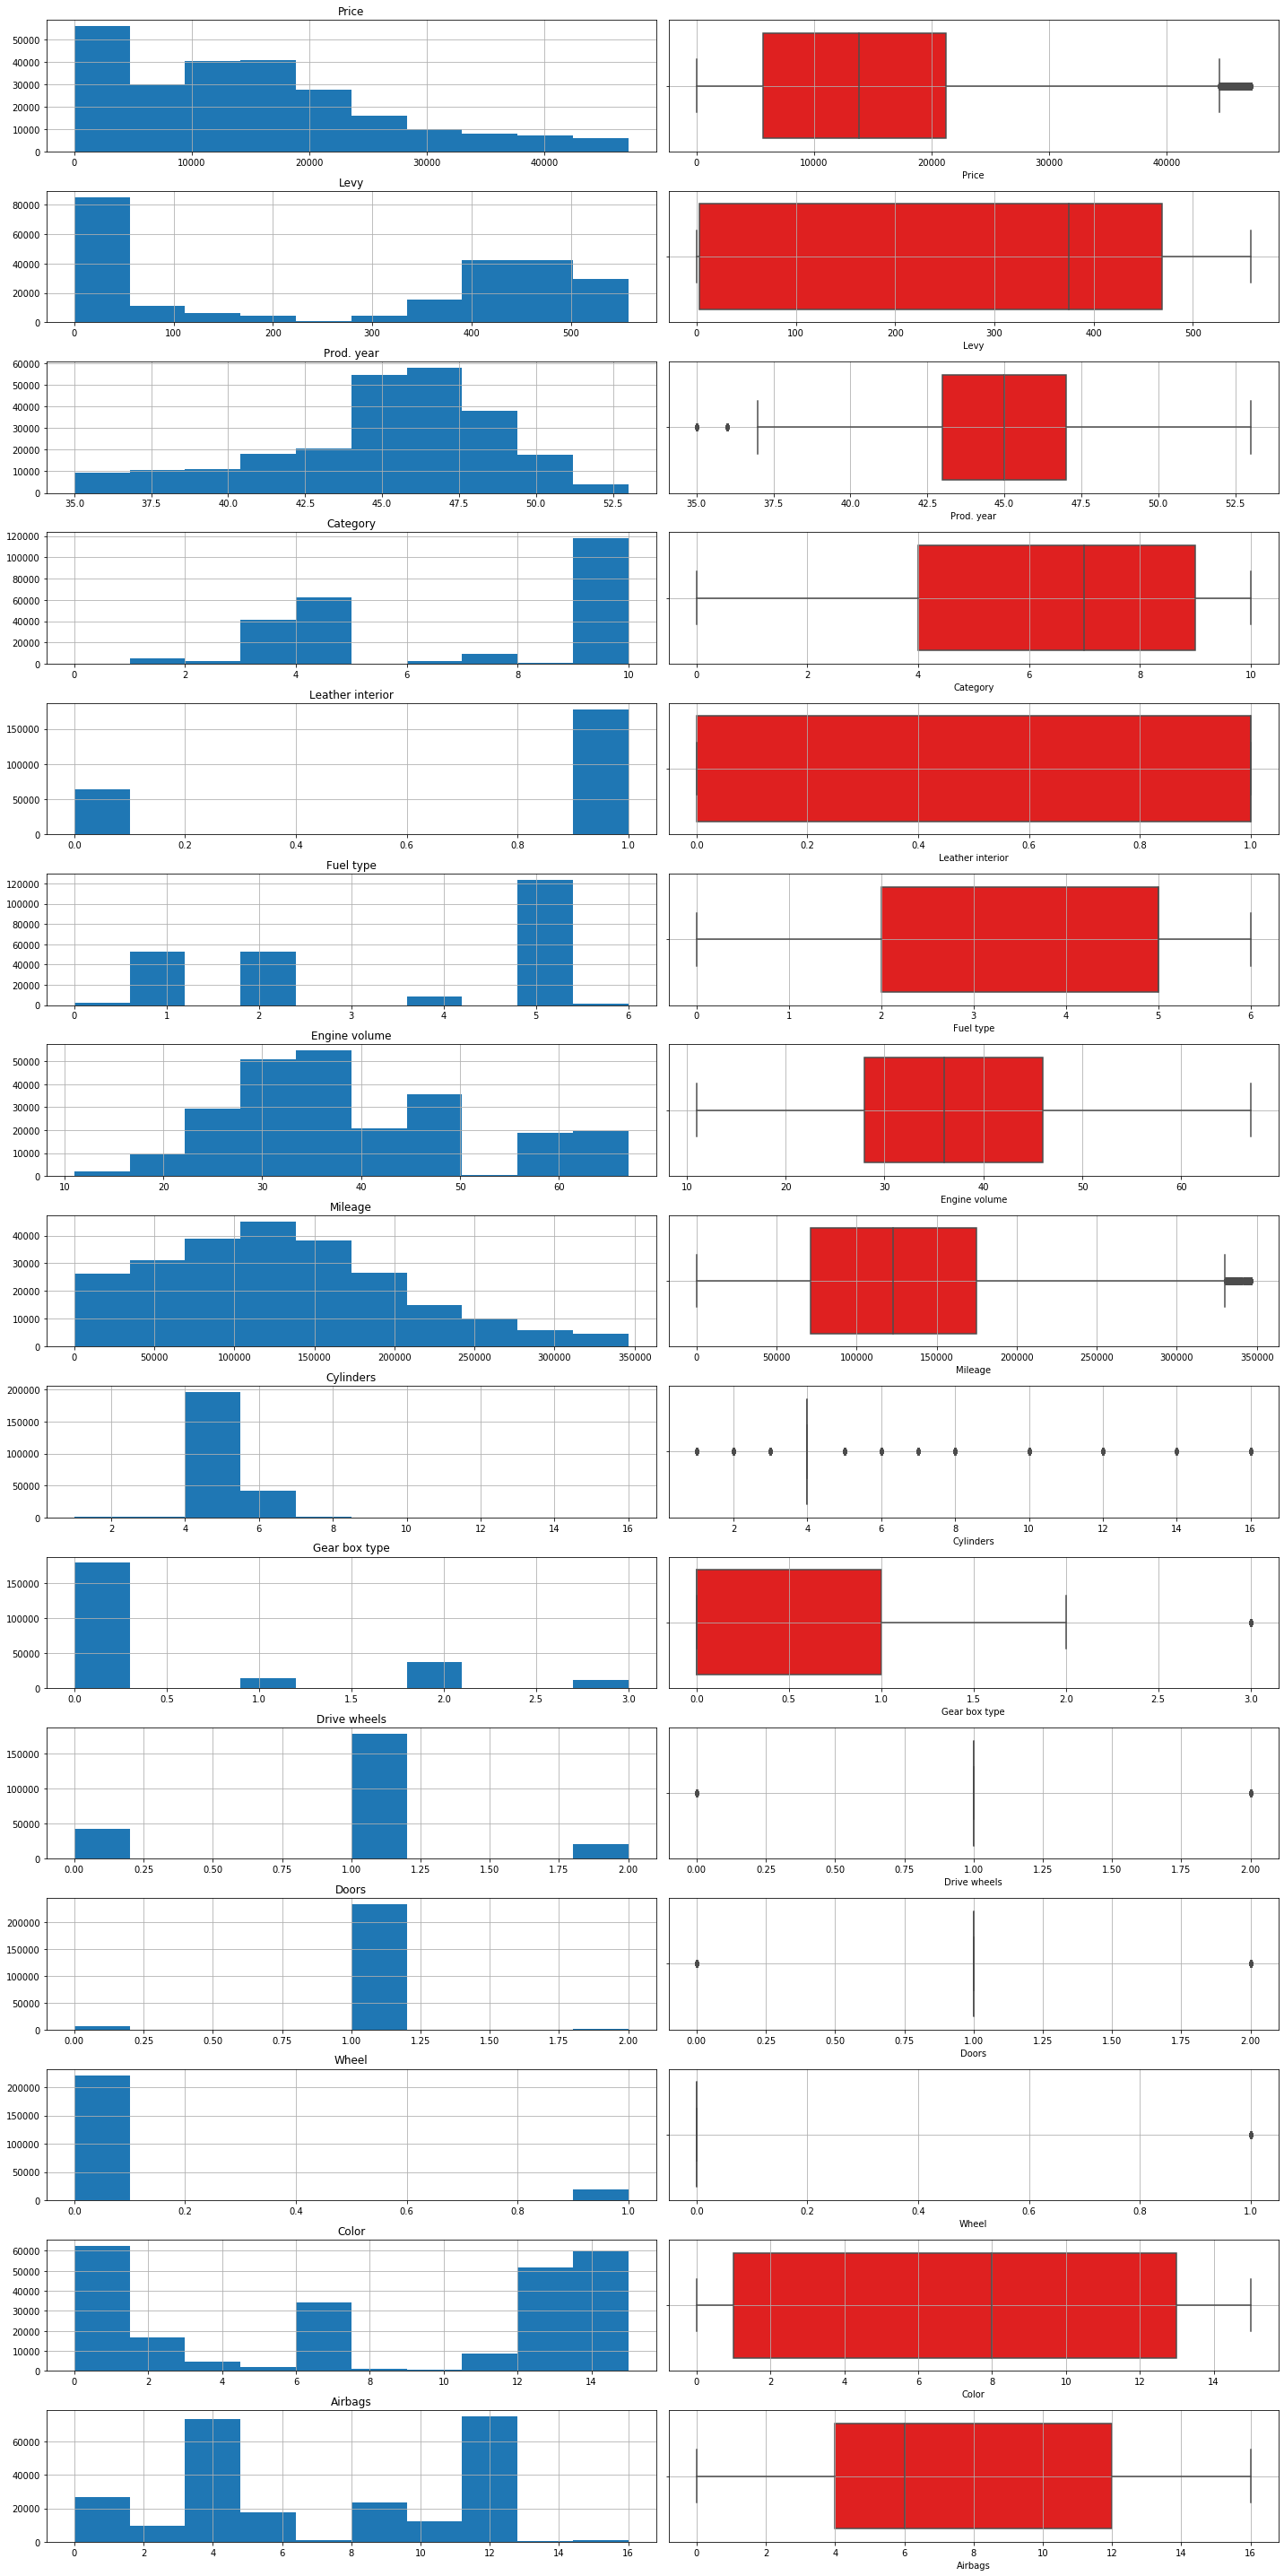

In [22]:
#Visualizing again
plt.figure(figsize=(20,40))
i = 1
for col in df1.columns:
    plt.subplot(15,2,i)
    plt.title(col,loc='center')
    plt.hist(df1[col])
    plt.grid()
    plt.tight_layout()
    i = i+1
    plt.subplot(15,2,i)
    sns.boxplot(df1[col], color = 'red')
    plt.grid()
    plt.tight_layout()
    i=i+1
    if i>30:
        break

In [23]:
#The shapes of the data frame before and after outlier treatment
print('The shape of the data frame before outlier treatment is {0} and after is {1}'.format(a,df1.shape))

The shape of the data frame before outlier treatment is (19237, 15) and after is (241632, 15)


Let's apply log transformation on `Price` So that its distribution will be near to normal distribution.

In [24]:
df1['Price'] = np.log(df1['Price']+1)
df1['Price']

0         9.497697
1         9.718482
2         9.044050
3         8.190909
4         9.369649
           ...    
19231     8.666130
19233     9.660269
19234    10.170035
19235     8.581482
19236     6.154858
Name: Price, Length: 241632, dtype: float64

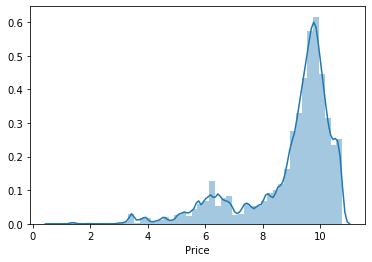

In [25]:
#Visualizing Price colum
sns.distplot(df1['Price'])

In [26]:
#Checking correlations
corr = df1.corr()
corr

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
Price,1.000000,0.059594,0.078882,-0.004119,-0.083156,-0.036999,-0.086325,-0.124274,-0.100552,0.198890,0.100432,-0.026356,-0.085026,0.041998,-0.147355
Levy,0.059594,1.000000,0.381652,0.080055,0.287612,-0.032227,-0.216911,-0.069790,-0.282798,-0.260602,0.032491,0.101995,-0.321450,0.054819,-0.082195
Prod. year,0.078882,0.381652,1.000000,0.134352,0.298665,0.080920,-0.054900,-0.335618,-0.151324,-0.223040,0.003671,0.092125,-0.349117,-0.025869,0.165663
Category,-0.004119,0.080055,0.134352,1.000000,0.118850,0.147969,0.119009,-0.011724,-0.005367,-0.014603,0.168682,0.201873,-0.144079,-0.033493,0.152446
Leather interior,-0.083156,0.287612,0.298665,0.118850,1.000000,-0.080317,0.287140,0.010077,0.167957,-0.310763,-0.041613,0.046553,-0.382335,-0.059183,0.106324
Fuel type,-0.036999,-0.032227,0.080920,0.147969,-0.080317,1.000000,-0.135029,-0.188988,-0.048584,0.125137,-0.008924,-0.034482,0.094163,-0.073411,0.107112
Engine volume,-0.086325,-0.216911,-0.054900,0.119009,0.287140,-0.135029,1.000000,0.199076,0.671779,-0.033106,-0.200944,-0.023885,-0.241462,-0.120563,0.327269
Mileage,-0.124274,-0.069790,-0.335618,-0.011724,0.010077,-0.188988,0.199076,1.000000,0.158136,0.010690,-0.084158,-0.004311,-0.015399,0.005229,-0.004258
Cylinders,-0.100552,-0.282798,-0.151324,-0.005367,0.167957,-0.048584,0.671779,0.158136,1.000000,0.039956,-0.169347,-0.040314,-0.082782,-0.099096,0.247091
Gear box type,0.198890,-0.260602,-0.223040,-0.014603,-0.310763,0.125137,-0.033106,0.010690,0.039956,1.000000,0.066851,-0.067884,0.159932,-0.031524,0.097394


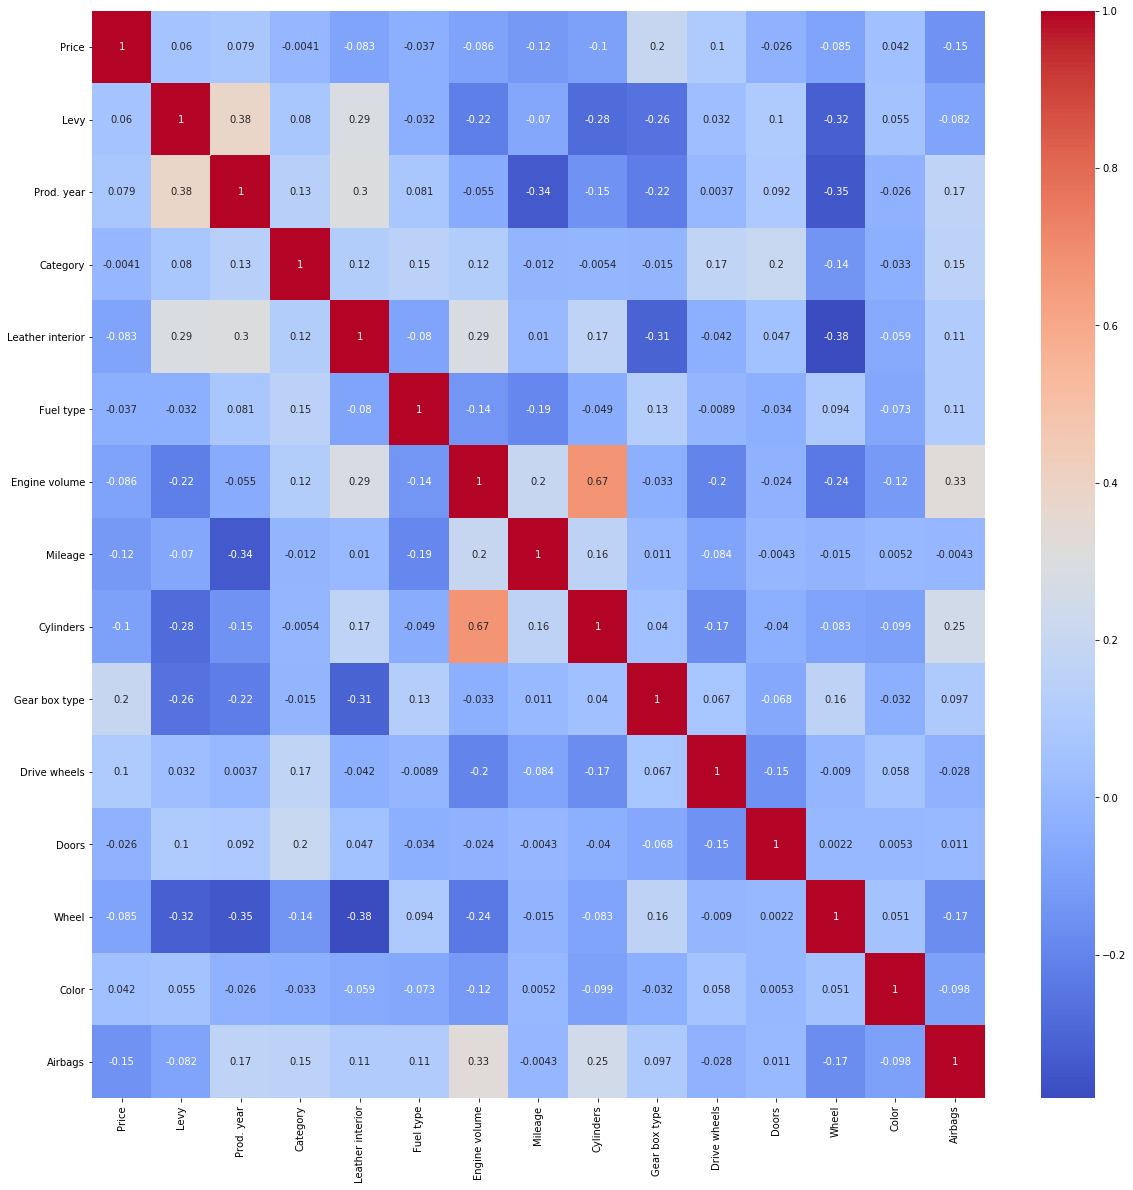

In [27]:
#Heat map
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True, cmap = 'coolwarm')

`Inference:`
There's a high correlation between Engine volume and cylinders. Let's drop `Cylinders` as the Engine volume is sufficient to explain the volume.

In [28]:
#Dropping Cylinders
df1.drop('Cylinders',axis=1,inplace=True)
df1

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,9.497697,114,43,4,1,2,63,186005,0,0,1,0,12,12
1,9.718482,4,44,4,0,5,56,192000,2,0,1,0,1,8
2,9.044050,0,39,3,0,5,22,200000,3,1,1,1,1,2
3,8.190909,512,44,4,1,2,46,168966,0,0,1,0,14,0
4,9.369649,366,47,3,1,5,22,91901,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,8.666130,17,46,9,1,1,63,107800,0,2,1,0,7,12
19233,9.660269,504,44,9,1,5,44,161600,2,1,1,0,11,8
19234,10.170035,508,43,4,1,1,36,116365,0,1,1,0,7,4
19235,8.581482,83,40,4,1,1,36,51258,0,1,1,0,1,4


## 3. Train-Test-Split & Feature scaling

In [29]:
X = df1.drop('Price',axis=1)
y = df1['Price']

In [30]:
#Test-Train Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)


In [31]:
#Shapes
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(169142, 13) (72490, 13) (169142,) (72490,)


In [32]:
#Using Standard scaler to scale all numerical features
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
import warnings
warnings.filterwarnings('ignore')

In [33]:
cols = X_train.columns.tolist()
cols

['Levy',
 'Prod. year',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags']

In [34]:
#scaling the train and test data (independent features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[cols])
X_test = scaler.transform(X_test[cols])

In [35]:
#scaling the dependent features
y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test = scaler.transform(np.array(y_test).reshape(-1,1))

## 4. Linear regression model 

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(X_train,y_train)

In [37]:
#Making predictions on train data
y_pred_train = lr.predict(X_train)
y_pred_train

array([[-0.0177313 ],
       [-0.45575433],
       [ 0.13448084],
       ...,
       [-0.33113328],
       [-0.33960672],
       [ 0.1354658 ]])

In [38]:
#Making predictions on test data
y_pred_test = lr.predict(X_test)
y_pred_test

array([[-0.28967105],
       [-0.14770975],
       [ 0.57733685],
       ...,
       [ 0.15428282],
       [-0.10146894],
       [ 0.7361548 ]])

In [39]:
#Applying inverse transform
y_pred_train_org = scaler.inverse_transform(y_pred_train)
y_pred_test_org = scaler.inverse_transform(y_pred_test)
y_train_org = scaler.inverse_transform(y_train)
y_test_org = scaler.inverse_transform(y_test)

Text(0, 0.5, 'Residuals')

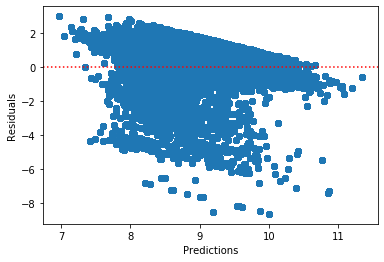

In [40]:
#residuals
y_res = y_train_org - y_pred_train_org
#Visualizing residuals vs predictions
plt.scatter( y_pred_train_org , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residuals")

Text(0, 0.5, 'Predicted values')

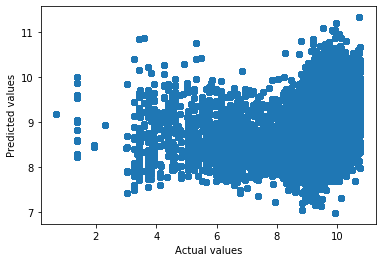

In [41]:
#actual vs predicted
plt.scatter(y_train_org,y_pred_train_org)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

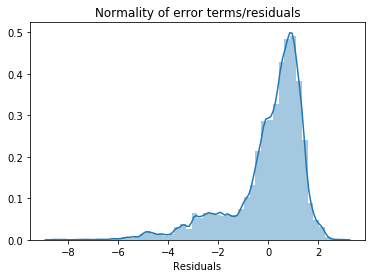

In [42]:
#Let's check the distribution of error terms
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

`Inferences:`
1. Residuals are not independent.
2. They don't have constant variance.
3. Having a nearly normal distribution.

<br>
Thus, this model not satisfying the linear regression assumptions completely. Let's check the r2score and rmsle metrics.

In [43]:
#Calculating r2_score and rmsle score
from sklearn.metrics import mean_squared_log_error, r2_score
r2_train_lr = r2_score(y_train_org, y_pred_train_org)
r2_test_lr = r2_score(y_test_org, y_pred_test_org)
print('R2 score for train set: {0} & R2 score for test set: {1}'.format(r2_train_lr,r2_test_lr))
print('********************************************************************************************')

rmsle_train_lr = np.sqrt(mean_squared_log_error(y_train_org, y_pred_train_org))
rmsle_test_lr = np.sqrt(mean_squared_log_error(y_test_org, y_pred_test_org))
print('RMSLE score for train set: {0} & RMSLE score for test set: {1}'.format(rmsle_train_lr,rmsle_test_lr))

R2 score for train set: 0.12792162324849077 & R2 score for test set: 0.13128747921683526
********************************************************************************************
RMSLE score for train set: 0.17884449503474814 & RMSLE score for test set: 0.18044075632444295


In [44]:
#Storing results in a data frame
result = pd.DataFrame({'Algorithm used':['Linear Regression'],'R2score of train data':[r2_train_lr],
                       'R2score of test data':[r2_test_lr],'RMSLE of train data':[rmsle_train_lr],
                       'RMSLE of test data':[rmsle_test_lr]})
result

,Algorithm used,R2score of train data,R2score of test data,RMSLE of train data,RMSLE of test data
0,Linear Regression,0.127922,0.131287,0.178844,0.180441


## 5. Decision Tree regressor 

`Note`: Feature scaling is not required for Decision trees, Random forests, Boosting algorithms. Becuase these won't use distance measurement techniques i.e, Euclidean distance, Manhattan distance, etc., unlike Linear regression, Logistc regression, KNN, KMeans,etc.,

In [45]:
from sklearn.model_selection import train_test_split
#Performing Train-test split on original data frame
X = df1.drop('Price',axis=1)
y = df1['Price']

#Split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100,shuffle=True)


After experimenting with multiple hyper parameters in the decision tree regressor, we got a beautiful r2 score and rmsle with the following parameters,
- max_depth = 20
- min_samples_leaf = 5
- criterion = friedman_mse <br><br>
So, let's build our decision tree regressor setting the above parameters while keeping the remaining parameters default.

In [46]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=20,
                      min_samples_leaf=5,
                          criterion='friedman_mse')
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=5)

In [47]:
#Predictions and evaluation
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)
print('R2 score for train set: {0} & R2 score for test set: {1}'.format(r2_score_train,r2_score_test))
print('********************************************************************************************')
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_pred_train))
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred_test))
print('RMSLE score for train set: {0} & RMSLE score for test set: {1}'.format(rmsle_train,rmsle_test))

R2 score for train set: 0.9453503407093179 & R2 score for test set: 0.9417439799653022
********************************************************************************************
RMSLE score for train set: 0.045546956107898925 & RMSLE score for test set: 0.047722623146199204


In [48]:
result.loc[len(result)] = ['Decision tree regressor',r2_score_train,r2_score_test,rmsle_train,rmsle_test]

In [49]:
result

,Algorithm used,R2score of train data,R2score of test data,RMSLE of train data,RMSLE of test data
0,Linear Regression,0.127922,0.131287,0.178844,0.180441
1,Decision tree regressor,0.945350,0.941744,0.045547,0.047723


Using Decision tree regressor, we got a beautiful scores on both train and test data. So, let's consider this model to make predictions on the final test data. First, we will save this model so that it can be used to make predictions  on the similar use cases without training from scratch.

In [50]:
#Saving the Decision tree model
import joblib
joblib.dump(dt,'dtreemodel.pkl')

['dtreemodel.pkl']

## 6. Making Predictions on the Test data

In [51]:
#reading the test data
df2 = pd.read_csv('test.csv')
df2

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,1357,FIAT,Stilo,2004,Universal,No,Petrol,1.6,164000 km,4,Manual,Front,04-May,Left wheel,Blue,6,NaN
8241,45682346,-,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8 Turbo,156000 km,4,Tiptronic,Front,04-May,Left wheel,Black,6,NaN
8242,45649860,1646,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907 km,8,Automatic,4x4,04-May,Left wheel,Black,0,NaN
8243,45809706,784,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000 km,4,Automatic,Front,04-May,Left wheel,Green,4,NaN


In [52]:
#Considering only the relevant columns
cols

['Levy',
 'Prod. year',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags']

In [53]:
df2 = df2[cols]
df2

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,-,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,Manual,Front,02-Mar,Left wheel,Grey,10
1,-,2012,Sedan,Yes,Petrol,2.4,26000 km,Tiptronic,Front,04-May,Left wheel,Grey,10
2,-,2005,Sedan,No,Petrol,1.5,168000 km,Automatic,Front,04-May,Right-hand drive,Sky blue,8
3,975,2012,Jeep,Yes,Petrol,3.2,143000 km,Automatic,4x4,04-May,Left wheel,Blue,12
4,-,1993,Hatchback,No,Petrol,1.6,200000 km,Manual,Front,04-May,Left wheel,Black,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,1357,2004,Universal,No,Petrol,1.6,164000 km,Manual,Front,04-May,Left wheel,Blue,6
8241,-,2012,Sedan,Yes,Petrol,2.8 Turbo,156000 km,Tiptronic,Front,04-May,Left wheel,Black,6
8242,1646,2015,Jeep,Yes,Petrol,4.6,102907 km,Automatic,4x4,04-May,Left wheel,Black,0
8243,784,2017,Hatchback,Yes,Petrol,1.5,3000 km,Automatic,Front,04-May,Left wheel,Green,4


In [54]:
#Feature Engineering - Mileage
df2['Mileage'] = df2['Mileage'].apply(lambda x: x[:-2])
df2['Mileage'] = df2['Mileage'].astype('int64')
df2['Mileage']

0            0
1        26000
2       168000
3       143000
4       200000
         ...  
8240    164000
8241    156000
8242    102907
8243      3000
8244    321269
Name: Mileage, Length: 8245, dtype: int64

In [55]:
#Feature engineering - Wheel
df2['Wheel']=df2['Wheel'].replace('Left wheel','Left-hand drive')
df2['Wheel'].value_counts()

Left-hand drive     7631
Right-hand drive     614
Name: Wheel, dtype: int64

In [56]:
#Feature engineering -  Doors 
df2['Doors'].value_counts()

04-May    7841
02-Mar     352
>5          52
Name: Doors, dtype: int64

In [57]:
df2['Doors']=df2['Doors'].map({'04-May':'4-5','02-Mar':'2-3','>5':'>5'})
df2['Doors'].value_counts()

4-5    7841
2-3     352
>5       52
Name: Doors, dtype: int64

In [58]:
df2

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,-,2012,Hatchback,No,Diesel,2.0 Turbo,0,Manual,Front,2-3,Left-hand drive,Grey,10
1,-,2012,Sedan,Yes,Petrol,2.4,26000,Tiptronic,Front,4-5,Left-hand drive,Grey,10
2,-,2005,Sedan,No,Petrol,1.5,168000,Automatic,Front,4-5,Right-hand drive,Sky blue,8
3,975,2012,Jeep,Yes,Petrol,3.2,143000,Automatic,4x4,4-5,Left-hand drive,Blue,12
4,-,1993,Hatchback,No,Petrol,1.6,200000,Manual,Front,4-5,Left-hand drive,Black,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,1357,2004,Universal,No,Petrol,1.6,164000,Manual,Front,4-5,Left-hand drive,Blue,6
8241,-,2012,Sedan,Yes,Petrol,2.8 Turbo,156000,Tiptronic,Front,4-5,Left-hand drive,Black,6
8242,1646,2015,Jeep,Yes,Petrol,4.6,102907,Automatic,4x4,4-5,Left-hand drive,Black,0
8243,784,2017,Hatchback,Yes,Petrol,1.5,3000,Automatic,Front,4-5,Left-hand drive,Green,4


In [59]:
#Info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Levy              8245 non-null   object
 1   Prod. year        8245 non-null   int64 
 2   Category          8245 non-null   object
 3   Leather interior  8245 non-null   object
 4   Fuel type         8245 non-null   object
 5   Engine volume     8245 non-null   object
 6   Mileage           8245 non-null   int64 
 7   Gear box type     8245 non-null   object
 8   Drive wheels      8245 non-null   object
 9   Doors             8245 non-null   object
 10  Wheel             8245 non-null   object
 11  Color             8245 non-null   object
 12  Airbags           8245 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 837.5+ KB


In [60]:
#Label encoding all the categorical and the Prod. year columns 
for col in cats:
    df2[col] = label_encoder.fit_transform(df2[col])
df2['Prod. year'] = label_encoder.fit_transform(df2['Prod. year'])
df2

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,0,36,3,0,1,32,0,1,1,0,0,7,10
1,0,36,9,1,5,39,26000,2,1,1,0,7,10
2,0,29,9,0,5,20,168000,0,1,1,1,13,8
3,427,36,4,1,5,54,143000,0,0,1,0,2,12
4,0,17,3,0,5,22,200000,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,92,28,10,0,5,22,164000,1,1,1,0,2,6
8241,0,36,9,1,5,48,156000,2,1,1,0,1,6
8242,146,39,4,1,5,75,102907,0,0,1,0,1,0
8243,381,41,3,1,5,20,3000,0,1,1,0,6,4


In [61]:
#Let's make predictions using the 'dt' - Decision tree regressor on the above dataframe and store the results in 'Price' column
df2['Price'] = dt.predict(df2)
df2['Price']

0       9.044050
1       8.987322
2       8.883779
3       6.587107
4       8.967122
          ...   
8240    8.589142
8241    4.795791
8242    9.006387
8243    8.351139
8244    7.406711
Name: Price, Length: 8245, dtype: float64

In [62]:
#Applying anti-log to transform into the normal values
df2['Price'] = np.exp(df2['Price'])-1
df2['Price']

0       8467.00000
1       8000.00000
2       7213.00000
3        724.67808
4       7840.00000
           ...    
8240    5372.00000
8241     120.00000
8242    8154.00000
8243    4234.00000
8244    1646.00000
Name: Price, Length: 8245, dtype: float64

In [63]:
#Storing the Price column as a separate dataframe
submission = pd.DataFrame(df2['Price'])
submission

,Price
0,8467.00000
1,8000.00000
2,7213.00000
3,724.67808
4,7840.00000
...,...
8240,5372.00000
8241,120.00000
8242,8154.00000
8243,4234.00000


In [64]:
#Saving as .csv file
submission.to_csv('my_submission_file.csv',index=False)